In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from google.colab import files

# Đọc dữ liệu từ file CSV
uploaded = files.upload()

# Lấy tên file CSV
filename = list(uploaded.keys())[0]


Saving data_processing.csv to data_processing.csv


In [2]:
df = pd.read_csv(filename)

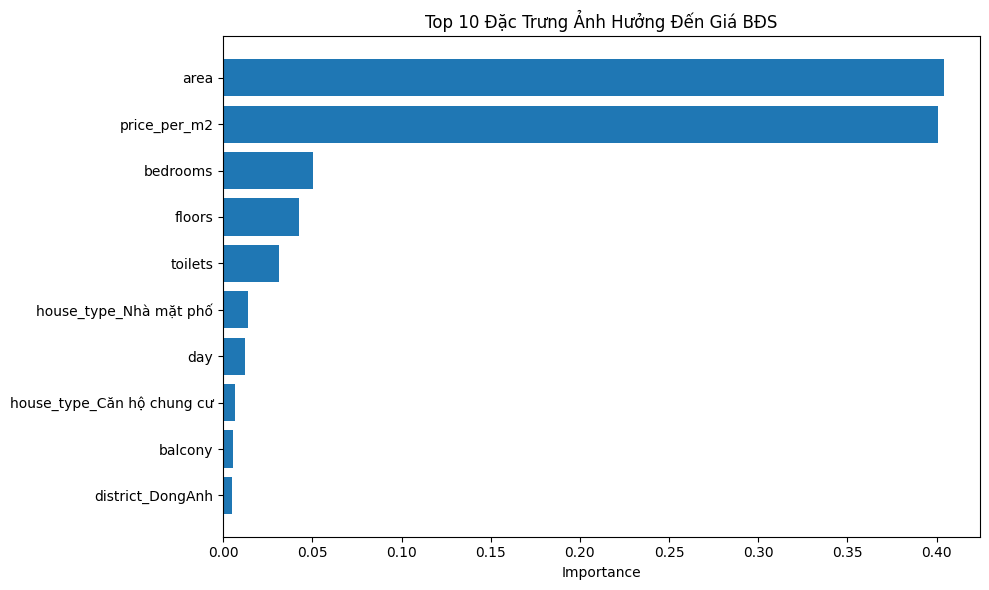

      District  Average Price
12    HoanKiem     109.023632
18    PhuXuyen      63.250000
23       TayHo      47.335045
24   ThachThat      42.860568
15      MeLinh      34.091111
0       BaDinh      33.414457
10  HaiBaTrung      31.658060
20     QuocOai      29.379195
5    DanPhuong      25.308953
3      CauGiay      25.247138
7       DongDa      25.182083
11     HoaiDuc      23.510406
1         BaVi      20.507273
6      DongAnh      19.902719
14    LongBien      18.530868
2    BacTuLiem      18.374925
27   ThanhXuan      17.641428
13    HoangMai      17.131524
17   NamTuLiem      16.179928
9       HaDong      16.079915
8       GiaLam      13.381821
28   ThuongTin      12.229884
26    ThanhTri      10.731980
22      SonTay       9.413333
25    ThanhOai       6.929388
19     PhucTho       6.550000
29      UngHoa       5.950000
21      SocSon       5.783200
4     ChuongMy       5.378421
16       MyDuc       5.010000


In [3]:
# Tách dữ liệu đầu vào (X) và giá (y)
X = df.drop(columns=['price'])
y = df['price']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest để đánh giá đặc trưng
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tính độ quan trọng của đặc trưng
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng của top 10 đặc trưng
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Đặc Trưng Ảnh Hưởng Đến Giá BĐS')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Phân tích giá trung bình theo từng quận/huyện
district_columns = [col for col in df.columns if col.startswith('district_')]
district_avg_prices = {}

for col in district_columns:
    district_name = col.replace('district_', '')
    avg_price = df.loc[df[col], 'price'].mean()
    district_avg_prices[district_name] = avg_price

# Chuyển kết quả thành DataFrame
district_price_df = pd.DataFrame(list(district_avg_prices.items()), columns=['District', 'Average Price'])
district_price_df = district_price_df.sort_values(by='Average Price', ascending=False)

# Hiển thị bảng
print(district_price_df)

In [4]:
import seaborn as sns

In [5]:
!pip install --upgrade patsy

In [6]:
!pip install --upgrade statsmodels

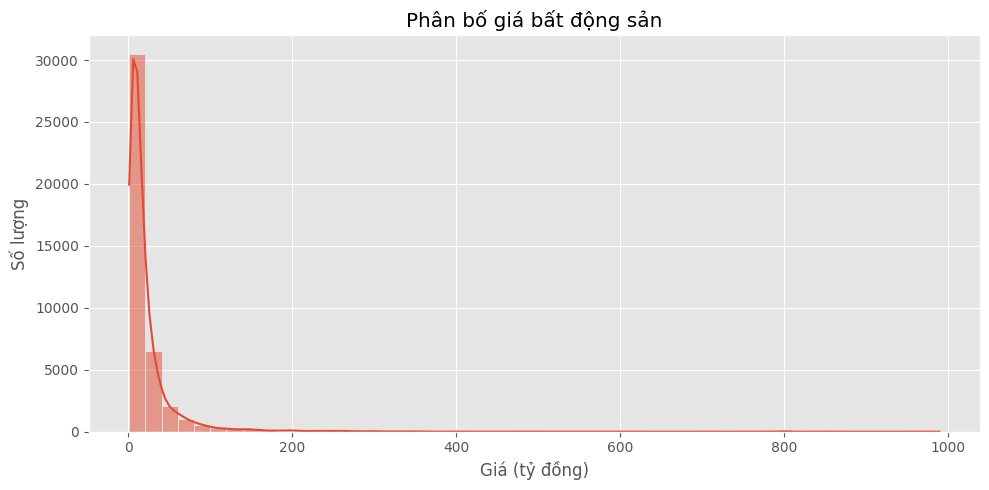

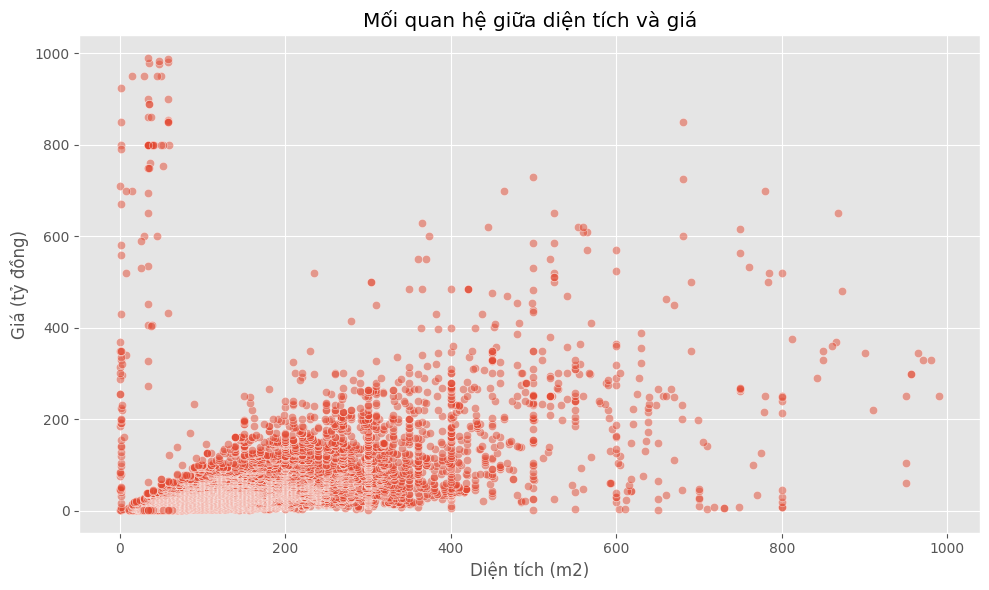

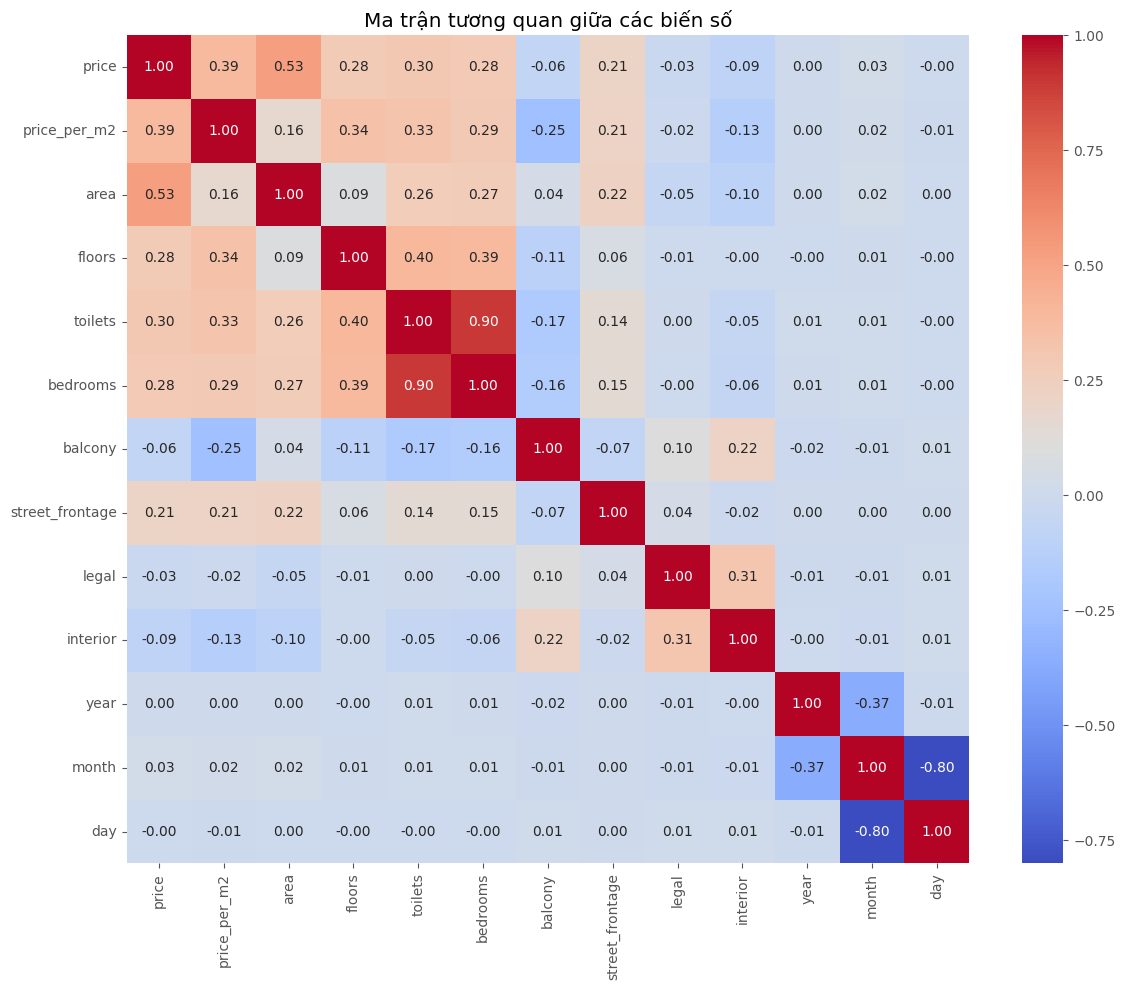

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Thiết lập phong cách biểu đồ
plt.style.use("ggplot")

# 1. Biểu đồ phân bố giá bất động sản
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Phân bố giá bất động sản')
plt.xlabel('Giá (tỷ đồng)')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

# 2. Biểu đồ scatter giữa diện tích và giá
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, alpha=0.5)
plt.title('Mối quan hệ giữa diện tích và giá')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (tỷ đồng)')
plt.tight_layout()
plt.show()

# 3. Heatmap tương quan giữa các biến số
numeric_cols = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến số')
plt.tight_layout()
plt.savefig('EDA.png', dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download('EDA.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>